---
# 1. Setup and Data Processing

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
%matplotlib inline


def data(n_samples = 100, seed = 123, separable = True):
    
    np.random.seed(seed)

    if separable == True: # separable
        # genrate points using Gaussian distributions
        p1 = np.random.multivariate_normal([0, 0], [[1, .95],[.95, 1]], n_samples)
        p2 = np.random.multivariate_normal([1, 4], [[1, .65],[.65, 1]], n_samples)
        X = np.vstack((p1, p2)).astype(np.float32)
        Y = np.hstack((np.ones(n_samples), -np.ones(n_samples)))  

    else: # nonseparable
        p1 = np.random.multivariate_normal([0, 0], [[1, .55],[.55, 1]], n_samples)
        p2 = np.random.multivariate_normal([1, 2.5], [[1, .55],[.55, 1]], n_samples)
        X = np.vstack((p1, p2)).astype(np.float32)
        Y = np.hstack((np.ones(n_samples), - np.ones(n_samples)))  
        # X, Y = make_moons(n_samples, noise=0.3, random_state=seed)
    return X,Y

---
# 2. Implementation of Learning Algorithms

## Important Functions

In [21]:
# @title Helper Functions

# sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# sgn function (step function)
def sgn(z):

    return 2*(z>0.5).astype(float)-1  # returns {-1,+1}

# X: features, Y: targes, W: weights, Z: scores (net-value)
def log_likelihood(X, Y, W):
    Z = np.dot(X,W)
    LL = np.sum( Y*Z - np.log(1 + np.exp(Z)) )
    return np.sum(LL)

# predict using given model (W) and data point(s) X
def predict(W, X):
    X = np.hstack((np.ones((X.shape[0], 1)), X))                
    Y = sigmoid(np.dot(X,W))
    return 2*(Y>0.5).astype(float)-1 , Y

# compute the prediciton accuracy 
# Y_pred are predicted tarets, and Y_true are groundtruth targets
# note, targets are expected to be from the set {0,1} 
def pred_accuracy(Y_pred, Y_true):
    return 1-np.sum(np.square(Y_true-Y_pred))/(Y_true.shape[0])

In [22]:
# @title Ploting Functions

def plot_model_1(W, X, Yc, smooth = True):
    xmin = X[:,0].min()-0.5
    xmax = X[:,0].max()+0.5
    ymin = X[:,1].min()-0.5
    ymax = X[:,1].max()+0.5
    xx, yy = np.mgrid[xmin:xmax:0.01, ymin:ymax:0.01]
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = predict(W, grid) 
    probs = np.array(probs[smooth]).reshape(xx.shape)    
    contour = plt.contourf(xx, yy, probs, 25, cmap="RdBu", vmin=0, vmax=1)
    plt.scatter(X[:, 0], X[:, 1], c=Yc, alpha=.5, s=50, 
            cmap="RdBu", vmin=-.2, vmax=1.2,
            edgecolor="white", linewidth=1)
    plt.axis([xmin, xmax, ymin, ymax])
    # plt.axis('equal')
    ax = plt.gca()

def plot_model_2(W, X, Yc):
    xmin = X[:,0].min()-0.5
    xmax = X[:,0].max()+0.5
    ymin = X[:,1].min()-0.5
    ymax = X[:,1].max()+0.5
    x1 = np.linspace(X[:, 0].min()-0.5, X[:, 0].max()+0.5)
    x2 = -W[1]*x1/W[2]-W[0]/W[2] 
    plt.scatter(X[:, 0], X[:, 1], c = Yc, alpha = .5, cmap="RdBu")
    plt.plot(x1, x2, color='red')
    plt.axis([xmin, xmax, ymin, ymax])
    # plt.axis('equal')
    ax = plt.gca()

## Task 1: Logistic Regression (MLE) 

the Logistic Regression training function using the Maximum Likelihood Estimation (MLE) approach. In particular, implement the log-likelihood loss gradient descent update rule in the indicated location in the code below. 





In [139]:
#- @title Logistic Regression Implementation (MLE)

# input: X are features, Y are targets
# output: W are parameters of the model (weights and bias)
def train_logistic_regression(X, Y, max_iter, learning_rate, print_iter = False, regularize = False):

    # augment the data points with the additional constant 1 to allow for dot-products
    b = np.ones((X.shape[0], 1))
    X = np.hstack((b, X))
        
    # init the model paramerers with zeros
    W = np.zeros(X.shape[1])        
    threshold = 1e-6
        
    # iterate over the set and perform training
    for iteration in range(max_iter): 

    
        # implement the gradient descent (GD) update for logistic regression: w = w - learning_rate*gradient 
        # Note that here, we use full gradient method (Not SGD): in the lecture slides we only show the gradient of a single sample, so you need to be carefull when computing the gradient.
        ## 1. Calculate the full gradient
        for i in range (X.shape[0]):
            c = np.dot(X[i], W)
            predict = sigmoid(Y[i]*c)
            output_error =  predict - Y[i] 
            grad = np.dot(X[i], output_error)



        ## 2. Update the parameters with GD 

            W = W - learning_rate * grad


  

        # terminate the function if len of grad is small enough (smaller than threshold)
            if np.sum(grad*grad) < threshold: 
                break

        # print log-likelihood every 100th iteration
            if (print_iter==True) & (iteration % 100 == 0):                
              # print(np.sum(grad*grad))
              print(log_likelihood(X,Y,W))
            pass

                
    # output the model parameter vector W
    print("training complete, W =", W, ", iterations:", iteration)
    return W


## Task 2: Perceptron 
Implement the basic perceptrin learning update rule. Implment the iterative perceptron update function. 





Implement the following:
*   The percepron update function.
*   The training function stops when no more iterations are necessary.


In [140]:
#- @title Perceptron Implementation

# input: X are features, Y are targets
# output: W are parameters of the model (weights and bias)
def train_perceptron(X, Y, max_iter, print_iter = False):
    
    # augment the data points with the additional constant 1 to allow for dot-products
    b = np.ones((X.shape[0], 1))
    X = np.hstack((b, X))
        
    # init the model paramerers with zeros
    W = np.zeros(X.shape[1])       

    # iterate over the set and perform training
    for iteration in range(max_iter): 
        n_misclassified = 0 # Use it to count the missclassified samples

        #
        # 1. iterate over each data sample pair (features, target); deal with a sample at a time
        # 2. when encounter a mis-classified sample, update the parameters W with this sample according to the rule as described in the lecture slides
        # 3. count the number of mis-classified samples for each iteration (we will go through all samples in each iteration)
        # 4. terminate (break) the function when all samples are correctly classified (n_misclassified=0)

        # 1. iterate over each data sample pair (features, target); deal with a sample at a time
        for y,z in enumerate(X):
            a = sgn(np.dot(z.T, W))

            # 2. when encounter a mis-classified sample, update the parameters W with this sample according to the rule describe in the lecture slides

            if (np.squeeze(a) - Y[y]) != 0:
                W += ((Y[y] - a)*z)
           
            #### 3. count the number of mis-classified samples 
            n_misclassified = +1

      ## 4. terminate (break) the function when all samples are correctly classified (n_misclassified=0)
            if (n_misclassified==0):
                break

      # 

        # print log-likelihood every 100th iteration
        if (print_iter==True) & (iteration % 100 == 0):                
            # print(np.sum(grad*grad))
            print(log_likelihood(X,Y,W))
            pass

    # output the optimized model parameters
    print("training complete, W =", W, ", iterations:", iteration)
    return W

---
# 3. Training and Testing of the Models

The code below call the training functions which you should have completed above.

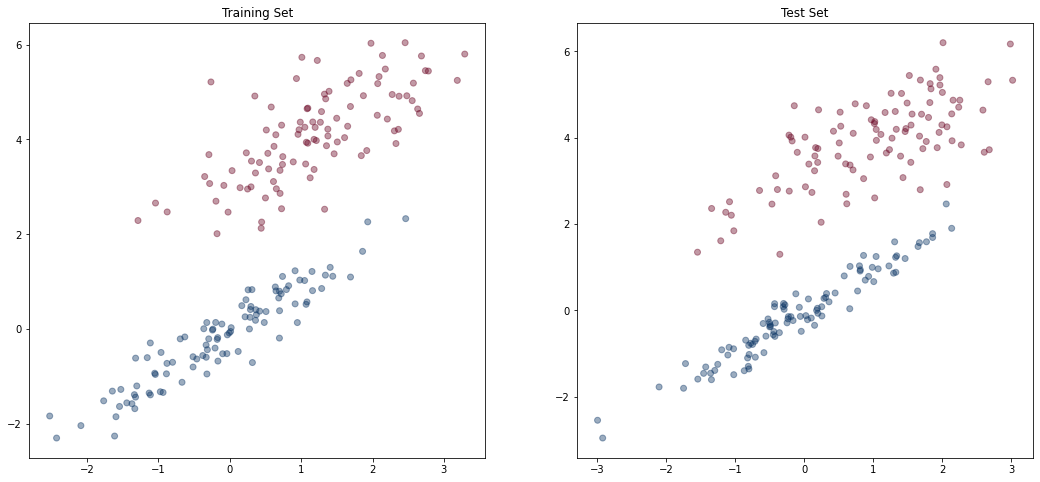

In [141]:
# @title Create and Plot Datasets

X_train, Y_train = data(n_samples = 100, seed = 123, separable = True)
X_test,  Y_test  = data(n_samples = 100, seed = 321, separable = True)

plt.subplots(figsize=(18, 8))
plt.subplot(1,2,1)
plt.scatter(X_train[:, 0], X_train[:, 1], c = Y_train, alpha = .4, cmap="RdBu")
plt.title("Training Set")
plt.subplot(1,2,2)
plt.scatter(X_test[:, 0],  X_test[:, 1],  c = Y_test,  alpha = .4, cmap="RdBu")
plt.title("Test Set")
plt.show()

In [142]:
# train logistic regression
W_logr = train_logistic_regression(X_train, Y_train, max_iter = 1000, learning_rate=0.5)
# train perceptron
W_perc = train_perceptron(X_train, Y_train, max_iter = 1000)


training complete, W = [ 117.26332716   77.354826   -147.28679971] , iterations: 999
training complete, W = [ 8.          3.51618099 -5.95746398] , iterations: 999


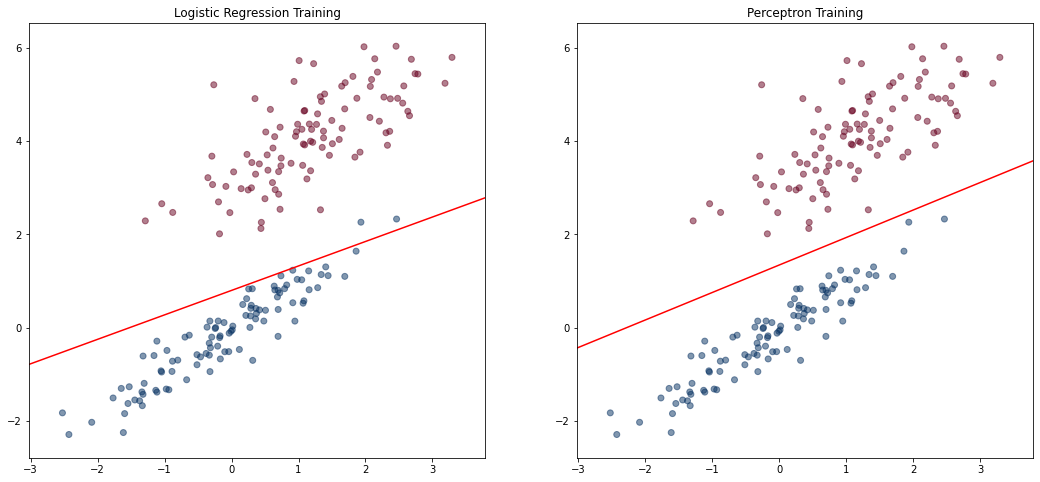

In [143]:
# @title Plot the trained models using the training sets

plt.subplots(figsize=(18, 8))
plt.subplot(1,2,1)
plot_model_2(W_logr, X_train, Y_train)
plt.title("Logistic Regression Training")
plt.subplot(1,2,2)
plot_model_2(W_perc, X_train, Y_train)
plt.title("Perceptron Training")
plt.show()

C:\Users\ramni\AppData\Local\Temp/ipykernel_27368/1996521605.py:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


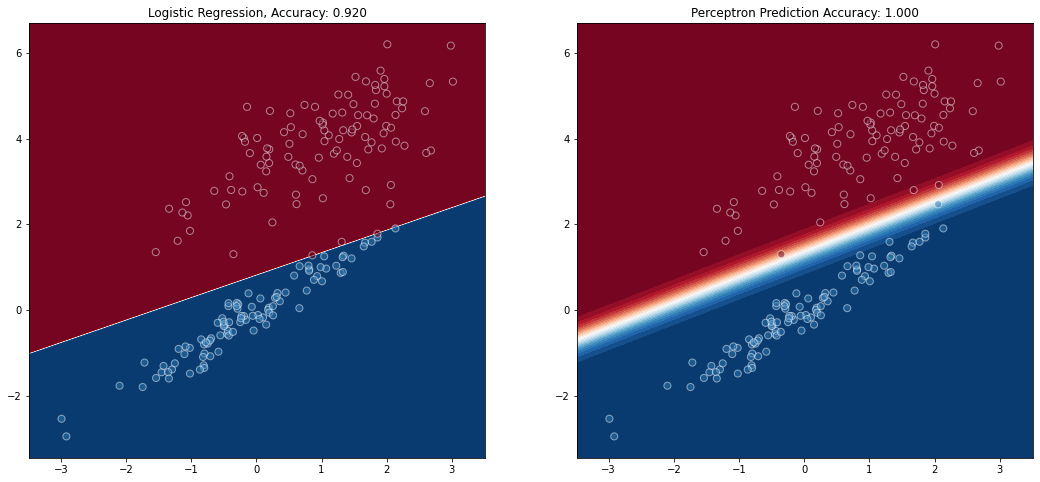

In [144]:
# @title Prediction of Logistic Regression using Test Data

Y_pred, Y_smooth = predict(W_logr, X_test)

plt.subplots(figsize=(18, 8))
plt.subplot(1,2,1)
plot_model_1(W_logr, X_test, Y_pred)
plt.title("Logistic Regression, Accuracy: %1.3f" %pred_accuracy(Y_test, Y_pred))

Y_pred, Y_smooth = predict(W_perc, X_test)

plt.subplot(1,2,2)
plot_model_1(W_perc, X_test, Y_pred)
plt.title("Perceptron Prediction Accuracy: %1.3f" %pred_accuracy(Y_test, Y_pred))
plt.show()

---
# 4. Train and Compare SCI-KIT LEARN 
https://scikit-learn.org/stable/

Sci-kit Learn is a Python framework for machine learning. We will use it in future assignments, please get familiar with it. 


## Task 3: Train the Models with sci-kit learn 

Below training and testing using models from the sci-kit learn toolkit

Fit the models with training data




In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix 
model1 = LogisticRegression()
model2 = Perceptron()



## Logistic Regression

# 
### 1. Fit the logistic regression model with training data
model1.fit(X_train, Y_train)



Y_logr_sck = model1.predict(X_test)
accuracy_logr_sck = accuracy_score(Y_test.flatten(), Y_logr_sck)
print('Logistic regression accuracy: ', accuracy_logr_sck)
print('Confusion matrix:\n', confusion_matrix(Y_test.flatten(), Y_logr_sck))
W_logr_sck = np.insert(model1.coef_[0], 0, model1.intercept_[0])

## Perceptron 
# 
### 2. Fit the perceptron model with training data
model2.fit(X_train, Y_train)



Y_perc_sck = model2.predict(X_test)
accuracy_perc_sck = accuracy_score(Y_test.flatten(), Y_perc_sck)
print('Percepton accuracy: ', accuracy_perc_sck)
print('Confusion matrix:\n', confusion_matrix(Y_test.flatten(), Y_perc_sck))
W_perc_sck = np.insert(model2.coef_[0], 0, model2.intercept_[0])


Logistic regression accuracy:  0.995
Confusion matrix:
 [[ 99   1]
 [  0 100]]
Percepton accuracy:  1.0
Confusion matrix:
 [[100   0]
 [  0 100]]


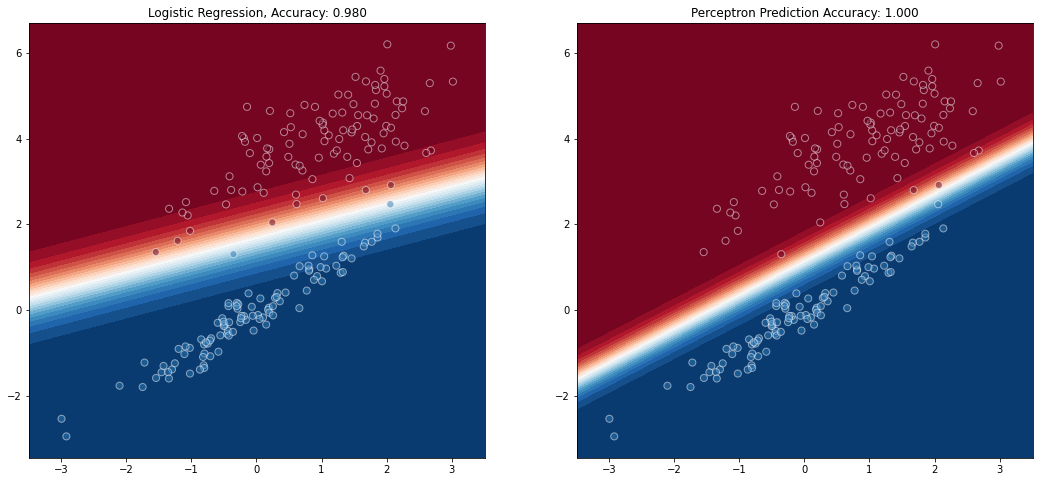

In [ ]:
# @title Prediction on Test Data given by Sci-Kit Learn models

Y_pred, Y_smooth = predict(W_logr_sck, X_test)

plt.subplots(figsize=(18, 8))
plt.subplot(1,2,1)
plot_model_1(W_logr_sck, X_test, Y_logr_sck)
plt.title("Logistic Regression, Accuracy: %1.3f" %pred_accuracy(Y_test, Y_logr_sck))

Y_pred, Y_smooth = predict(W_perc_sck, X_test)

plt.subplot(1,2,2)
plot_model_1(W_perc_sck, X_test, Y_perc_sck)
plt.title("Perceptron Prediction Accuracy: %1.3f" %pred_accuracy(Y_test, Y_perc_sck))
plt.show()